**Downloading Senate Voting Data**

In [1]:
import requests # to retrieve data from urls
import shutil # to duplicate csv files

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning) # suppresses a certificate verification warning

def callme(congress, bill):
    url = "https://www.govtrack.us/congress/votes/114-2016" # we are looking at bills from 2016, the 114th congress
    year = url[-4:] # this will help us title the csv files
    url = url + "/" + congress + bill + "/export/csv" # create the full csv url based on the function call
    print url
    r = requests.get(url, verify=False, stream=True, timeout=10.0)
    if r.status_code != 200: # if page is not found
        print "Failure!"
        exit()
    else:
        r.raw.decode_content = True
        with open("%s%s%s.csv" % (year, congress, bill), 'wb') as f:
            shutil.copyfileobj(r.raw, f) # copy and save the csv
        print "Success"

for i in range(1,164): 
    callme("s", str(i)) # we want to save csvs of the the senate votes 1-163 for the year 2016

https://www.govtrack.us/congress/votes/114-2016/s1/export/csv
Success
https://www.govtrack.us/congress/votes/114-2016/s2/export/csv
Success
https://www.govtrack.us/congress/votes/114-2016/s3/export/csv
Success
https://www.govtrack.us/congress/votes/114-2016/s4/export/csv
Success
https://www.govtrack.us/congress/votes/114-2016/s5/export/csv


KeyboardInterrupt: 

** Creating a Senate Network**

In [2]:
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import pydot
import pydotplus


G = nx.MultiGraph()
color_map = []

def multigraph_to_weighted_graph(M):
    """Convert a nx.MultiGraph into a weighted nx.Graph."""
    G = nx.Graph()
    for u,v,data in M.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if G.has_edge(u,v):
            G[u][v]['weight'] += w
        else:
            G.add_edge(u, v, weight=w)
    return G


def addabill(bill):
    

    #renaming columns for easier use
    column_names = ['person', 'state', 'district', 'vote', 'name', 'party'] #renames numerical column labels with actual column labels
    x = pd.read_csv(bill, header=None, skiprows=2, names =column_names) #skips title of document

    #print x
    #print(x['vote'])
    #print(x['person'])
    #print x.iterrows()

    #add senators
    G.add_nodes_from(x['name'])


    #make a list of yes voters and no voters, and non-voters
    yesVoters = []
    noVoters = []
    nonVoters = []
    for index, row in x.iterrows():
        if(row['vote'] == 'Yea'):
            yesVoters.append(row['name'])
            G.add_nodes_from
        elif(row['vote'] == 'Nay'):
            noVoters.append(row['name'])
        elif(row['vote'] == 'Not Voting'):
            nonVoters.append(row['name'])
        #print row['vote'], row['name']

    for i, pol_i in enumerate(yesVoters):
        for j, pol_j in enumerate(yesVoters):
            if i < j:
                G.add_edge(pol_i, pol_j)


    for i, pol_i in enumerate(noVoters):
        for j, pol_j in enumerate(noVoters):
            if i < j:
                G.add_edge(pol_i, pol_j)

                
    for i, pol_i in enumerate(nonVoters):
        for j, pol_j in enumerate(nonVoters):
            if i < j:
                G.add_edge(pol_i, pol_j)

    import sys
    reload(sys)
    sys.setdefaultencoding('utf8')


    #make a list of Republicans, Democrats, and Other
    rep = []
    dem = []
    other = []
    for index, row in x.iterrows():
        if(row['party'] == 'Republican'):
            rep.append(row['name'])
        elif(row['party'] == 'Democrat'):
            dem.append(row['name'])
        else:
            other.append(row['name'])

    #create network of congresspeople colored on their party
    for node in G:
        if node in rep:
            color_map.append('red')
        elif node in dem:
            color_map.append('blue') 
        elif node in other:
            color_map.append('purple')
            
        
for i in range(1, 164):
    addabill("2016s%s.csv" %i)
    
G = multigraph_to_weighted_graph(G)
       

#print G.number_of_edges()
#print G.number_of_nodes()
#print G.nodes

**Visualization of 2016 Senate Bill Voting Network**

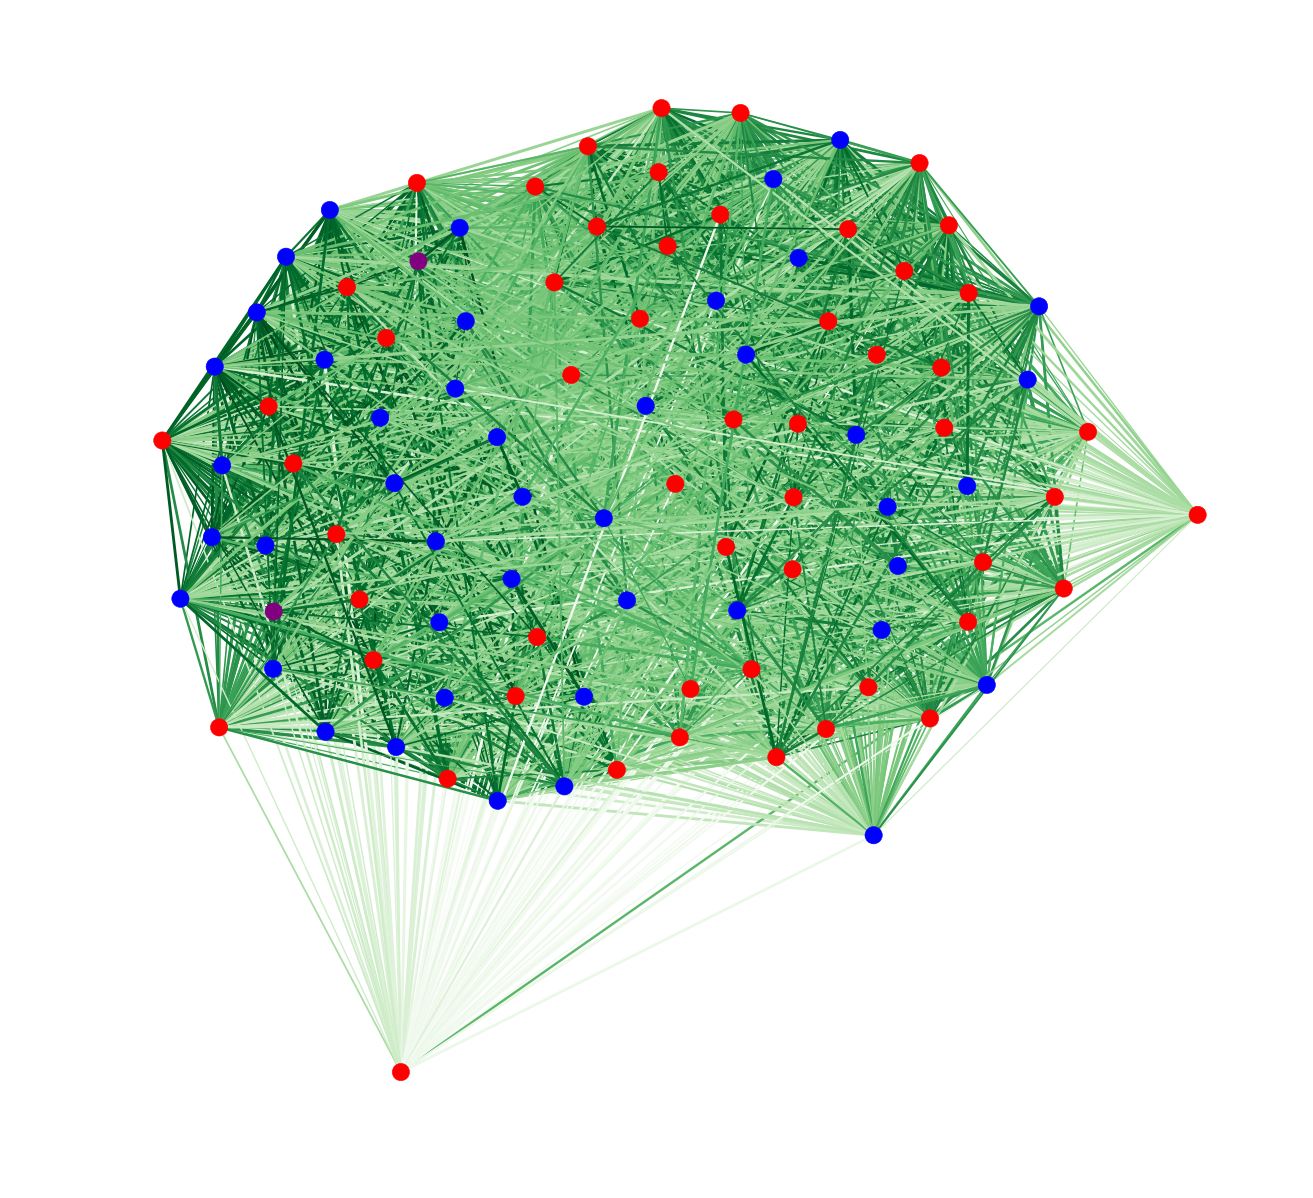

In [166]:
plt.figure(figsize=(20, 20))
plt.axis('Off')
pos = nx.spring_layout(G, k = .95, iterations=100)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G,pos=pos, node_color = color_map, edgelist=edges, edge_color=weights, width=[d['weight'] / 50. for _, _, d in G.edges(data=True)], edge_cmap=plt.cm.Greens)
plt.show()

In [167]:
# Old version of the network
'''plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k = .95, iterations=100)
nx.draw_networkx_nodes(G, node_color=color_map, pos=pos)
nx.draw_networkx_edges(G, width=[d['weight'] / 1000. for _, _, d in G.edges(data=True)], pos=pos)
plt.axis('Off')
plt.show()'''

"plt.figure(figsize=(20, 20))\npos = nx.spring_layout(G, k = .95, iterations=100)\nnx.draw_networkx_nodes(G, node_color=color_map, pos=pos)\nnx.draw_networkx_edges(G, width=[d['weight'] / 1000. for _, _, d in G.edges(data=True)], pos=pos)\nplt.axis('Off')\nplt.show()"

**Visualization of Senators' Total Number of Edges**

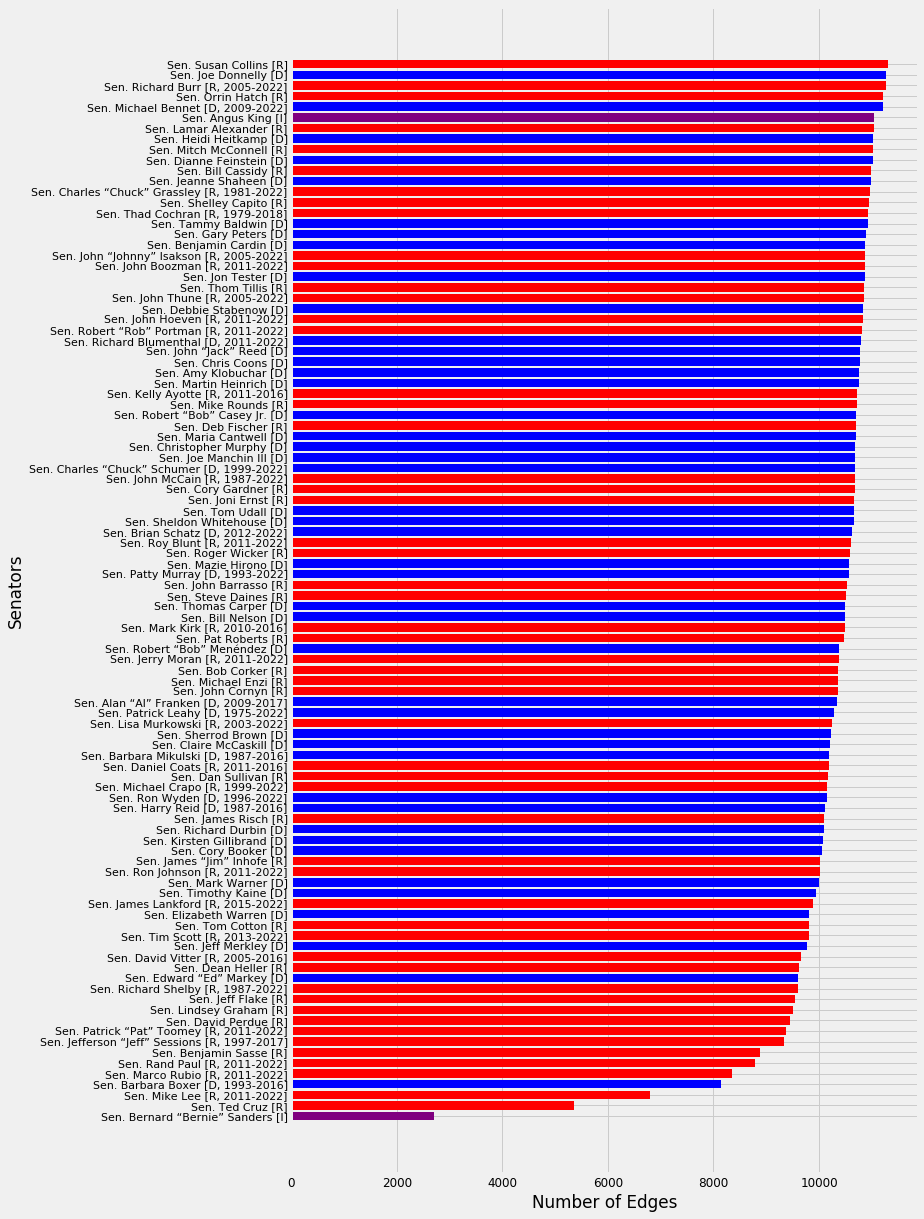

In [4]:
def sen_total_weights(senator):
    edgetotal = 0
    
    senlinks = G[senator]
    senlinks = dict(senlinks)
    
    for i in range(len(senlinks.items())):
        edgetotal += senlinks.values()[i].values()[0]
        
    return edgetotal



total_weight_dict = {}
for i in list(G.nodes()):
    total_weight_dict[i] = sen_total_weights(i)


keys, values = zip(*sorted(total_weight_dict.items(), key=lambda kv: kv[1]))

anewcolormap = []
rep = []
dem = []
other = []

for i in keys:
    if "[R" in i:
        rep.append(i)
    elif "[D" in i:
        dem.append(i)
    else:
        other.append(i)

#create network of congresspeople colored on their party
for node in keys:
    if node in rep:
        anewcolormap.append('red')
    elif node in dem:
        anewcolormap.append('blue') 
    elif node in other:
        anewcolormap.append('purple')

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 20))
plt.barh(range(len(values)), values, color=anewcolormap)
#plt.title("Who reaches across the aisle most frequently?", color = "black", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(range(len(values)), keys, fontsize=11)
#plt.yticks(fontsize = 12)
#plt.savefig("hello.png")
plt.ylabel("Senators")
plt.xlabel("Number of Edges")
plt.show()

**Calculation of Senators' Edges with Senators Outside of their Party**

In [5]:
def across_edges_total(senator):

    across_edges_total = 0

    sen_links = G[senator]
    sen_links = dict(sen_links)

    for key,val in sen_links.iteritems():
        # for republicans
        if "[R" in senator:
            if "[D" in key:
                across_edges_total += val.values()[0]
            elif "[I" in key:
                across_edges_total += val.values()[0]
                
        # for democrats
        elif "[D" in senator:
            if "[R" in key:
                across_edges_total += val.values()[0]
            elif "[I" in key:
                across_edges_total += val.values()[0]

        # for independents
        elif "[I" in senator:
            if "[R" in key:
                across_edges_total += val.values()[0]
            elif "[D" in key:
                across_edges_total += val.values()[0]
                
    return across_edges_total


across_edges_dict = {}
for i in list(G.nodes()):
    across_edges_dict[i] = across_edges_total(i)
    

'''plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 5))
plt.bar(across_edges_dict.keys(), across_edges_dict.values(), color = color_map)
plt.title("Who reaches across the aisle most?", color = "black", fontsize = 20)
plt.xticks(rotation=90, color = "black", fontsize = 10)
plt.show()'''

'plt.style.use(\'fivethirtyeight\')\nfig = plt.figure(figsize=(20, 5))\nplt.bar(across_edges_dict.keys(), across_edges_dict.values(), color = color_map)\nplt.title("Who reaches across the aisle most?", color = "black", fontsize = 20)\nplt.xticks(rotation=90, color = "black", fontsize = 10)\nplt.show()'

**Creating the Reach Metric by Dividing Bipartisan Edges by Total Edges**

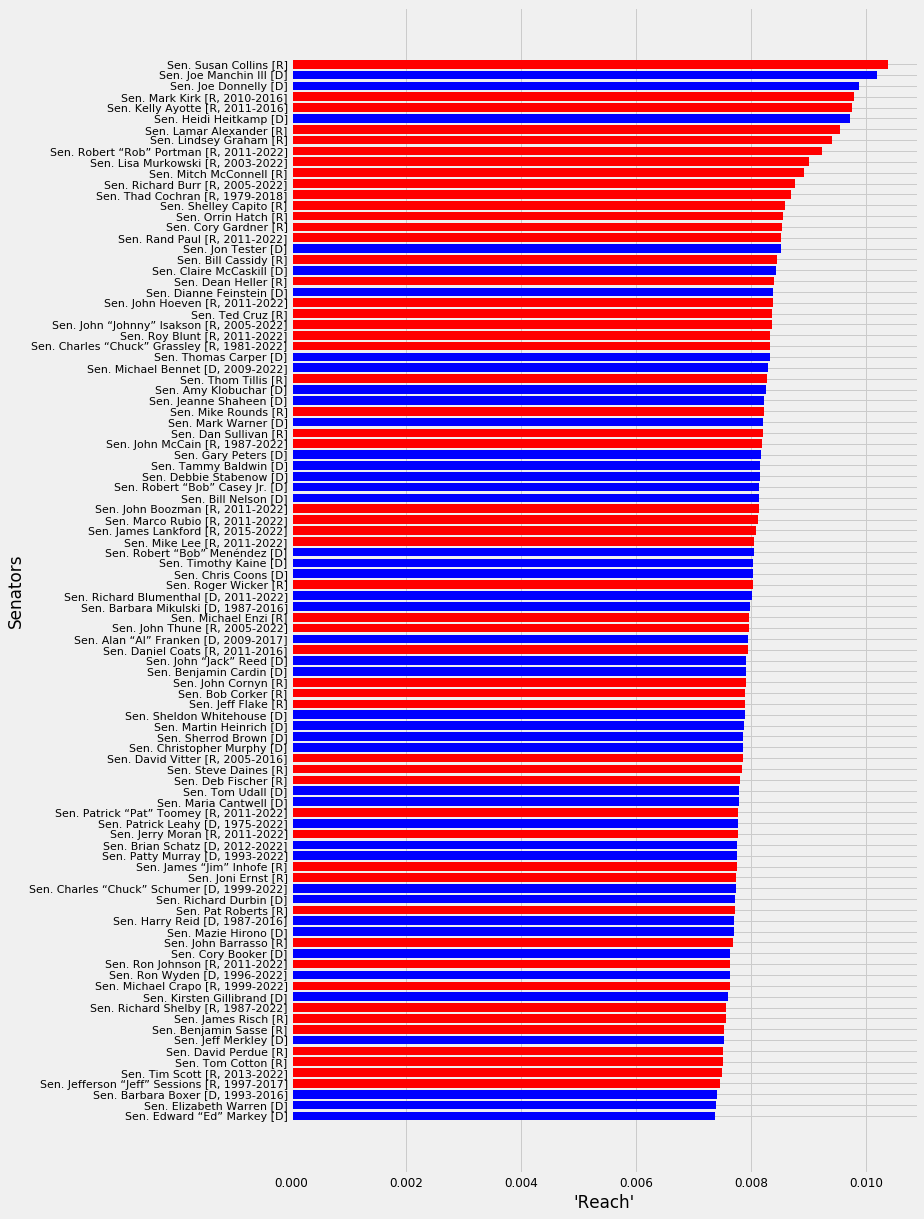

In [6]:
from __future__ import division

# the reach metric is the number of edges a senator has w/ opposite party divided by his number of total edges
reach_metric = dict((k, float(across_edges_dict[k]) / total_weight_dict[k]) for k in across_edges_dict)

adj_reach_metric = {}

for i, j in reach_metric.iteritems():
    if "[R" in i:
        adj_reach_metric[i] = j/44 # to normalize for the fact that there are only 44 democratic senators for republicans to vote with
    elif "[D" in i:
        adj_reach_metric[i] = j/54 # to normalize for the fact that there are 54 republicans for democrats to vote with

# we adjust the reach metrics to penalize democrat scores. they are inflated because there are more republicans in the senate to vote with
# once adjusted, our reach metric is the fraction of a senator's votes which are bipartisan per opposite party politician


keys, values = zip(*sorted(adj_reach_metric.items(), key=lambda kv: kv[1])) # we want to sort the bars from largest to smallest
  
anewcolormap = []
rep = []
dem = []
other = []

for i in keys:
    if "[R" in i:
        rep.append(i)
    elif "[D" in i:
        dem.append(i)
    else:
        other.append(i)

#create network of congresspeople colored on their party
for node in keys:
    if node in rep:
        anewcolormap.append('red')
    elif node in dem:
        anewcolormap.append('blue') 
    elif node in other:
        anewcolormap.append('purple')

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 20))
plt.barh(range(len(values)), values, color=anewcolormap)
#plt.title("Who reaches across the aisle most frequently?", color = "black", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(range(len(values)), keys, fontsize=11)
#plt.yticks(fontsize = 12)
#plt.savefig("hello.png")
plt.xlabel("'Reach'")
plt.ylabel("Senators")
plt.show()


In [14]:
# The below code gives data on each edge in the network and their weights
#G.edges(data=True)

**Getting Data on the Donations that each 2016 senator receives and putting it into a dictionary**

In [31]:
from matplotlib import pyplot as plt
import numpy as np
import os, re
import pandas as pd
import xlrd
import csv
import pandas as pd
import glob, os

#puts together candidate disbursements for 2010, 2012, and 2014 election cycles into one csv 'totalMoney.csv'
results = pd.DataFrame([])
for counter, file in enumerate(glob.glob("moneyFiles/senate*")):
    namedf = pd.read_csv(file, skiprows=0, usecols=[0,1])
    results = results.append(namedf)
results.to_csv('moneyFiles/totalMoney.csv')


#turns combined csv into dictionary where candidate is the key and the values are the list of donations for the candidate
import subprocess
reader = csv.DictReader(open('moneyFiles/totalMoney.csv'))
dict_list = []
for line in reader:
    dict_list.append(line)
senatorMoney = dict()
#makes keys and values
#gets rid of dollar sign and commas in numbers
for i in dict_list:
    if i.values()[1] in senatorMoney.keys():
        senatorMoney[i.values()[1]] += i.values()[2].replace("$", "").replace(",", "").replace("(", " ").replace(")", " ")

    else:
        senatorMoney[i.values()[1]] = i.values()[2].replace("$", "").replace(",", "").replace("(", " ").replace(")", " ")

#turns the string in the values into a list of float numbers and sums them together to get the total donated amount for each candidate
for key in senatorMoney.keys():
    senatorMoney[key] = senatorMoney[key].split(' ')
    for item in senatorMoney[key]:
        if item == '':
            senatorMoney[key].remove(item)
    senatorMoney[key] = map(float, senatorMoney[key])
    senatorMoney[key] = sum(senatorMoney[key])
print senatorMoney

**creating a dictionary based on the senator:money one, but only using senators' surnames as the keys**

In [ ]:
newdict = {}

for i,j in senatorMoney.iteritems():
    lastname = ""
    for letter in i:
        if letter != ",":
            lastname += (letter)
        else:
            break
    newdict[lastname] = j

**Format the surnames of senators so that only the first letter is capitalized**

In [26]:
moneydict = {}

for i,j in newdict.iteritems():
    lower = i.lower()
    moneydict[lower.capitalize()] = j

**creating a list of lists of senators' names, reach, and money donations**

In [58]:
totalinfo = []

for i,j in adj_reach_metric.iteritems():
    senatorinfo = []
    for l,m in moneydict.iteritems():
        lastname = l + " ["
        if lastname in i:
            senatorinfo.append([i,j,m])
    totalinfo.append(senatorinfo)

In [105]:
newlist = []
for i in range(len(totalinfo)):
    if len(totalinfo[i])!=0:
        newlist.append(totalinfo[i][0])

**Graphing Senator Money Donations vs. their reach scores**

In [108]:
reach = []
money = []
for i in newlist:
    reach.append(i[1])
    money.append(i[2])

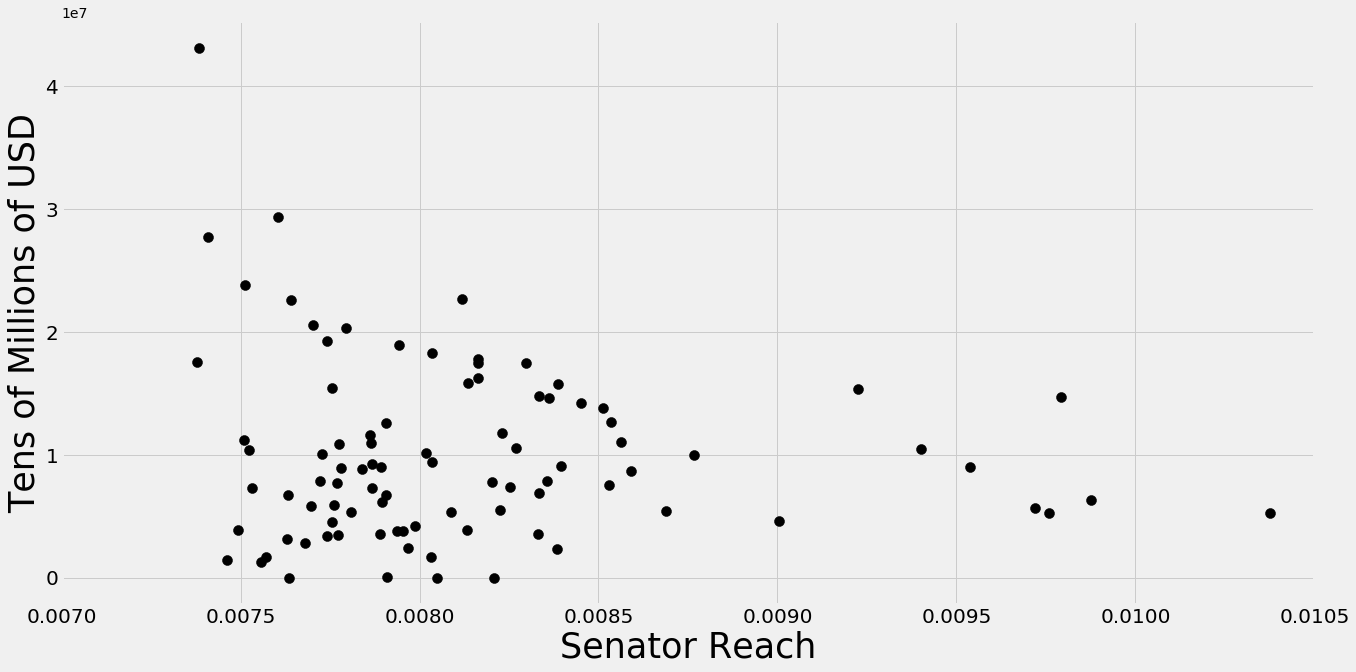

In [170]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 10))
plt.scatter(reach, money, color="black", s=100)
'''z = np.polyfit(reach, money, 1)
p = np.poly1d(z)
plt.plot(reach,p(reach),"r--")'''
plt.xlim(.007,.0105)
plt.xlabel("Senator Reach", fontsize=35)
plt.ylabel("Tens of Millions of USD", fontsize=35)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.title("Senator Donation Money vs. Senator Reach Score")
plt.show()